In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
import tensorflow as tf

# Check if TensorFlow detects any GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPUs detected: {[gpu.name for gpu in gpus]}")
    print("TensorFlow is using the GPU(s).")
else:
    print("No GPUs detected. TensorFlow is running on the CPU.")

# Verify the device used for computation
@tf.function
def simple_operation():
    return tf.matmul([[1.0]], [[1.0]])

# Run a simple operation to check the device
with tf.device('/GPU:0' if gpus else '/CPU:0'):
    result = simple_operation()
    print(f"Computation performed on: {result.device}")


GPUs detected: ['/physical_device:GPU:0']
TensorFlow is using the GPU(s).
Computation performed on: /job:localhost/replica:0/task:0/device:GPU:0


In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  
    shear_range=0.2, 
    zoom_range=0.2,  
    horizontal_flip=True  
)

training_set = train_datagen.flow_from_directory(
    r"D:\svasti vector solution\CNN_RoadDamageClassification\sih_road_dataset\Traning",  
    target_size=(64, 64),  
    batch_size=32, 
    class_mode='sparse'  
)


Found 1016 images belonging to 4 classes.


In [8]:
import os 

In [9]:
base_dir =  r"D:\svasti vector solution\CNN_RoadDamageClassification\sih_road_dataset\Traning"

folder_counts = {}

for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)
    if os.path.isdir(folder_path):
        file_count = len([file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))])
        folder_counts[folder_name] = file_count

for folder, count in folder_counts.items():
    print(f"Folder: {folder}, Image Count: {count}")


Folder: Good, Image Count: 254
Folder: Poor, Image Count: 254
Folder: Satisfactory, Image Count: 254
Folder: Very Poor, Image Count: 254


In [10]:
test_datagen = ImageDataGenerator(
    rescale=1./255,  
    shear_range=0.2, 
    zoom_range=0.2,  
    horizontal_flip=True  
)

test_set = test_datagen.flow_from_directory(
    r"D:\svasti vector solution\CNN_RoadDamageClassification\sih_road_dataset\Testing",  
    target_size=(64, 64),  
    batch_size=32, 
    class_mode='sparse'  
)

Found 256 images belonging to 4 classes.


In [11]:
base_dir =  r"D:\svasti vector solution\CNN_RoadDamageClassification\sih_road_dataset\Testing"

folder_counts = {}

for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)
    if os.path.isdir(folder_path):  
        file_count = len([file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))])
        folder_counts[folder_name] = file_count

for folder, count in folder_counts.items():
    print(f"Folder: {folder}, Image Count: {count}")


Folder: Good, Image Count: 64
Folder: Poor, Image Count: 64
Folder: Satisfactory, Image Count: 64
Folder: Very Poor, Image Count: 64


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [13]:
model = Sequential()

In [14]:
# 1st Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

C:\Users\RAKSHITHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.add(Flatten())

In [16]:
# 1st Dense Layer
model.add(Dense(64, activation='relu'))

# 2nd Dense Layer
model.add(Dense(32, activation='relu'))

In [17]:
# Output Layer 
model.add(Dense(4, activation='softmax')) 

In [18]:
model.compile(optimizer='adam',  # Optimizer
              loss='sparse_categorical_crossentropy',  # Loss function
              metrics=['accuracy'])  # Metric to monitor


Epoch 1/30


C:\Users\RAKSHITHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 345ms/step - accuracy: 0.4482 - loss: 1.2064 - val_accuracy: 0.5781 - val_loss: 1.2684
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 329ms/step - accuracy: 0.8606 - loss: 0.4673 - val_accuracy: 0.6211 - val_loss: 1.2787
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 285ms/step - accuracy: 0.8853 - loss: 0.3427 - val_accuracy: 0.6094 - val_loss: 1.2405
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 317ms/step - accuracy: 0.9123 - loss: 0.2697 - val_accuracy: 0.6133 - val_loss: 1.2899
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 296ms/step - accuracy: 0.9168 - loss: 0.2680 - val_accuracy: 0.6055 - val_loss: 1.4163
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 322ms/step - accuracy: 0.8987 - loss: 0.3392 - val_accuracy: 0.6133 - val_loss: 1.3980
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 320ms/step - accuracy: 0.9121 - loss: 0.2757 - val_accuracy: 0.6016 - val_loss: 1.3728
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 326ms/step - accuracy: 0.9127 - loss: 0.2574 - val_accuracy: 0.605

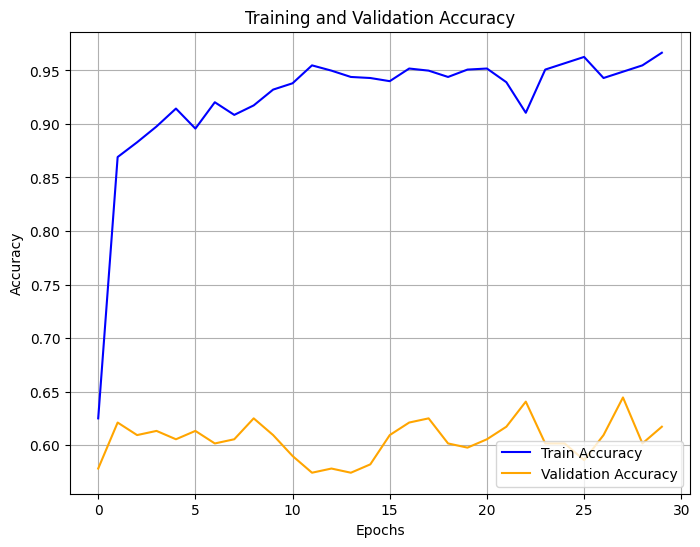

In [19]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(
    x=training_set,  # Training data
    validation_data=test_set,  # Validation data
    epochs=30  # Number of epochs
)

# Plotting the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [21]:
model.save(r"D:\svasti vector solution\CNN_RoadDamageClassification\road_damage_model.h5")
print("Successfully saved")

Successfully saved


In [22]:
from tensorflow.keras.models import load_model
loaded_model = load_model(r"D:\svasti vector solution\CNN_RoadDamageClassification\road_damage_model.h5")

loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         294,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 390,438 (1.49 MB)

 Trainable params: 390,436 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np


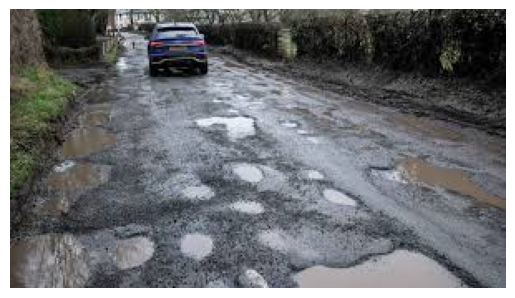

In [24]:
test_image1 = tf.keras.utils.load_img(r"D:\svasti vector solution\CNN_RoadDamageClassification\sih_road_dataset\test_img_VP.jpg")

plt.imshow(test_image1)
plt.axis('off')  
plt.show()

In [25]:
model = load_model(r"D:\svasti vector solution\CNN_RoadDamageClassification\road_damage_model.h5")

img_path = r"D:\svasti vector solution\CNN_RoadDamageClassification\sih_road_dataset\test_img_VP.jpg"

test_image = image.load_img(img_path, target_size=(64, 64))  
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0


prediction = model.predict(test_image)

predicted_class = np.argmax(prediction, axis=1)

class_labels = {0: 'Good', 1: 'Poor', 2: 'Satisfactory', 3: 'Very Poor'}

predicted_label = class_labels[predicted_class[0]]

print(f"The predicted class is: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
The predicted class is: Very Poor


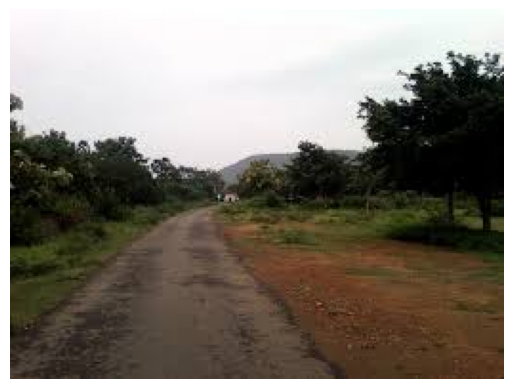

In [26]:
test_image1 = tf.keras.utils.load_img(r"D:\svasti vector solution\CNN_RoadDamageClassification\sih_road_dataset\test_img_P.jpg")

plt.imshow(test_image1)
plt.axis('off')  
plt.show()

In [27]:
model = load_model(r"D:\svasti vector solution\CNN_RoadDamageClassification\road_damage_model.h5")

img_path = r"D:\svasti vector solution\CNN_RoadDamageClassification\sih_road_dataset\test_img_P.jpg" 

test_image = image.load_img(img_path, target_size=(64, 64)) 
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0

prediction = model.predict(test_image)

predicted_class = np.argmax(prediction, axis=1)

class_labels = {0: 'Good', 1: 'Poor', 2: 'Satisfactory', 3: 'Very Poor'}

predicted_label = class_labels[predicted_class[0]]

print(f"The predicted class is: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
The predicted class is: Poor


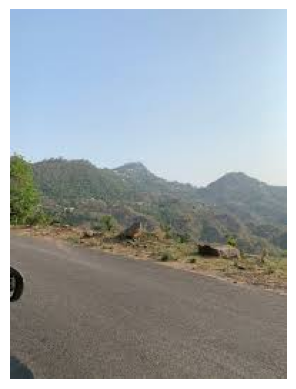

In [28]:
test_image1 = tf.keras.utils.load_img(r"D:\svasti vector solution\CNN_RoadDamageClassification\sih_road_dataset\test_img_Go.jpg")

plt.imshow(test_image1)
plt.axis('off')  
plt.show()

In [29]:
model = load_model(r"D:\svasti vector solution\CNN_RoadDamageClassification\road_damage_model.h5")

img_path = r"D:\svasti vector solution\CNN_RoadDamageClassification\sih_road_dataset\test_img_Go.jpg" 

test_image = image.load_img(img_path, target_size=(64, 64))  
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0

prediction = model.predict(test_image)

predicted_class = np.argmax(prediction, axis=1)

class_labels = {0: 'Good', 1: 'Poor', 2: 'Satisfactory', 3: 'Very Poor'}

predicted_label = class_labels[predicted_class[0]]

print(f"The predicted class is: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
The predicted class is: Good


In [30]:
train_accuracy = model.evaluate(training_set, verbose=0)[1]
val_accuracy = model.evaluate(test_set, verbose=0)[1]

print(f"Final Training Accuracy: {train_accuracy:.4f}")
print(f"Final Test Accuracy: {val_accuracy:.4f}")

Final Training Accuracy: 0.9724
Final Test Accuracy: 0.6172


In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 337ms/step


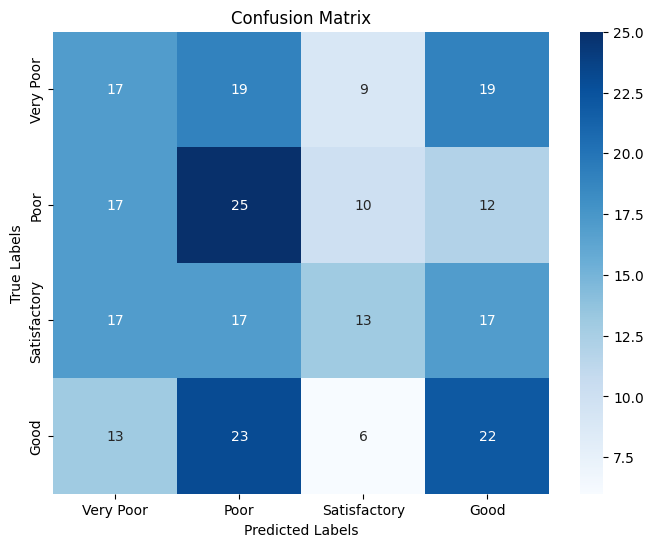

In [35]:


# Get predictions from the model
predictions = model.predict(test_set)

# Convert predictions to class labels (assuming one-hot encoding)
predicted_labels = np.argmax(predictions, axis=1)

# True labels (assumes using ImageDataGenerator or similar)
true_labels = test_set.classes

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Very Poor', 'Poor', 'Satisfactory', 'Good'], yticklabels=['Very Poor', 'Poor', 'Satisfactory', 'Good'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
